**1. Сгенерировать выборку из нормального распределения с заданными параметрами**

Работа генераторов случайных чисел основана на методе Монте-Карло. Будем использовать генерацию случайных чисел из библиотеки NumPy.
4-я цифра студ. билета - 1, 5-я - 0. Значит, необходимо сгенерировать выборку объемом 100 из нормального распределения с параметрами (1, 0.1)
Для генерации случайных чисел будем использовать функцию random.normal. Она принимает в качестве аргументов мат. ожидание, стандартное отклонение и объем выборки, поэтому в качетве второго аргумента мы должны взять квадратный корень из дисперсии, т.е. 0,31.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
data = np.random.normal(1, 0.31, 100)
print(data)

[1.19261601 0.66153476 0.98898839 0.60214761 0.75743881 1.24396332
 0.54826477 0.6559853  0.95832118 1.03068207 1.05169035 0.82146039
 0.72631293 0.6557438  1.39215261 1.11261808 0.68390512 0.86164646
 0.99384384 1.13725404 1.52794615 0.81241174 1.33170297 0.82765326
 0.91916362 0.25986352 1.11191654 1.03406033 0.62801117 1.24440114
 1.02397086 0.99666535 1.06780163 0.58748779 1.33413602 1.05450328
 1.35875244 1.33104659 1.14225394 0.883389   1.21650591 0.64162644
 1.40197624 1.34241436 1.35301903 1.07504084 1.45811304 1.16989858
 1.25098313 1.30364079 0.67701042 1.72286217 1.14729615 0.41331528
 0.8994487  1.12596304 1.33909948 0.82915689 1.27967684 1.12440532
 1.46989617 1.08882843 1.03272773 0.64984541 1.13547598 1.01933766
 1.13617166 1.30411917 1.16986406 1.03411846 0.72240864 1.08656258
 0.76976201 1.41584094 0.89072243 0.87120219 0.79428413 1.35302831
 0.91550137 1.24678431 1.16699073 1.45548528 0.45513842 0.88740702
 1.00940492 1.42556923 1.03208648 0.75171692 1.28993228 1.0651

Построим гистограмму выборки

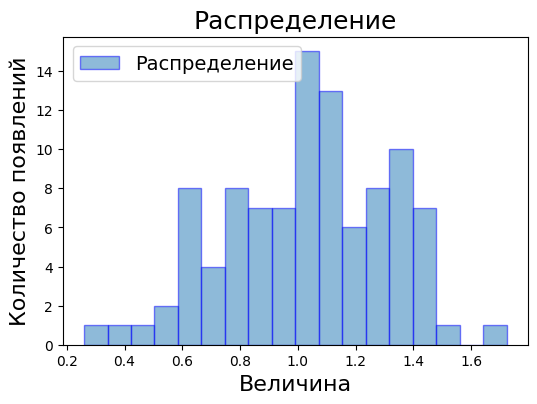

In [ ]:
plt.figure(figsize = (6, 4))

# зададим 18 интервалов и уровень прозрачности графиков
plt.hist(data, 18, edgecolor = "blue", alpha = 0.5, label = 'Распределение')

# пропишем расположение и размер шрифта легенды
plt.legend(loc = 'upper left', prop = {'size': 14})

# добавим подписи
plt.xlabel('Величина', fontsize = 16)
plt.ylabel('Количество появлений', fontsize = 16)
plt.title('Распределение', fontsize = 18)

plt.show()

Посчитаем описательные статистики: воспользуемся функциями из библиотеки statistics

In [ ]:
import statistics

print('выборочное среднее:     ', statistics.mean(data))
print('медиана:                ', statistics.median(data))
print('верхняя квартиль:       ', statistics.median_high(data))
print('нижняя квартиль:        ', statistics.median_low(data))
print('мода:                   ', statistics.mode(data))
print('размах:                 ', max(data)-min(data))
print('выборочная дисперсия    ', statistics.variance(data))

выборочное среднее:      1.0342963666389309
медиана:                 1.0506099835919214
верхняя квартиль:        1.051690354260635
нижняя квартиль:         1.049529612923208
мода:                    1.19261600665309
размах:                  1.4629986494026026
выборочная дисперсия     0.07863011210433694


**2. Проверить гипотезы о: 1. значении среднего; 2. значении дисперсии; 3. виде распределения.**

**№1**

Проверим гипотезу о значении среднего. Сформулируем нулевую гипотезу и альтернативу.

Н0: теоретичексое значение мат. ожидания (1) совпадает с истинным

Н1: не совпадает

Проверим нулевую гипотезу методом построения доверительного интервала. Для этого возьмем уровень значимости α = 0.05 и сначала предположим, что дисперсия нам известна и равна 0.1. Рассмотрим статистику:
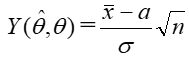. Она имеет стандартное нормальное распределение.

Решим неравенство

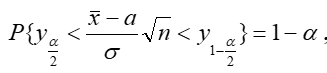

относительно a:

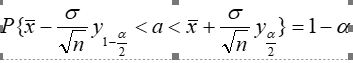

и получим границы доверительного интервала



Найдем по таблице квантили нормального распределения уровня 0.025 и 0.975: -1.96 и 1.96

и посчитаем значение статистики:

In [ ]:
gr1 = round(statistics.mean(data) - ((0.31/10) * (1.96)), 3)
gr2 = round(statistics.mean(data) - ((0.31/10) * (-1.96)), 3)

print(f'[{gr1}, {gr2}]')

[0.974, 1.095]


Теоретическое значение мат. ожидания а = 1 попадает в интервал, так что оснований отклонять Н0 нет.

Теперь проверим гипотезу H0, полагая, что значение дисперсии нам неизвестно.

Построим статистику:

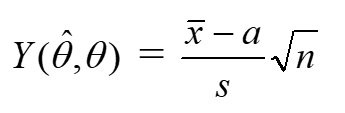,

где s - несмещенная выборочная дисперсия.

Эта статистика имеет распределение Стьюдента с (n -1) степенью свободы.
При верной Н0, значение мат ожидания должно попасть в интервал между критическими значениями с вероятностью >= 1-α (т.е. при Н0 это почти достоверное событие).

Получим неравентсва для определения границ интервала:

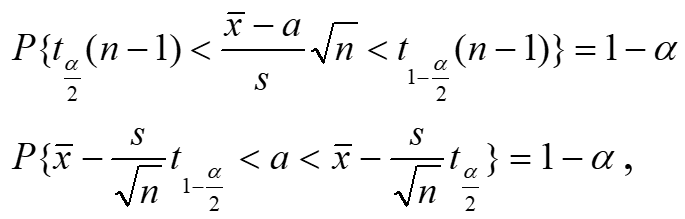

Найдем по таблице распределения Стюдента квантили уровня 0.025 и 0.975, число степеней свободы = 99: -1.98 и 1.98.
Проведем необходимые расчеты:

In [ ]:
import math

l1 = round(statistics.mean(data) - ((math.sqrt(statistics.variance(data)) / math.sqrt(100)) * (1.98)), 3)
l2 = round(statistics.mean(data) - ((math.sqrt(statistics.variance(data)) / math.sqrt(100)) * (-1.98)), 3)

print(f'[{l1}, {l2}]')

[0.979, 1.09]


Теоретическое значение мат. ожидания а = 1 попадает в интервал, так что оснований отклонять Н0 нет.

**№2**

Проверим гипотезу о значении дисперсии, также построив для этого доверительный интервал:

Н0: теоретическое значение дисперсии (0.1) совпадает с истинным

Н1: не совпадает

Несмещенная дисперсия s^2 является наилучшей оценкой теоретической дисперсии. Посчитаем ее, воспользовавшись встроенной функцией:

In [ ]:
s_square = statistics.variance(data)
print('s^2 =', round(s_square, 3))

s^2 = 0.079


Выясним, является ли отклонение теорического значения дисперсии от истинного значимым.

Для проверки воспользуемся статистикой:

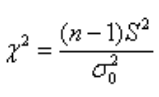

Выборочное пространство нормально и поэтому эта статистика имеет распределение хи-квадрат с (n-1) степенью свободы.
Воспользуемся методом построения доверительного интервала  с помощью статистики Y такой, что

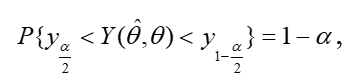

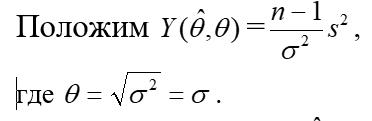

Проведем с этим равенством преобразования, чтобы получить границы дверительного интервала:

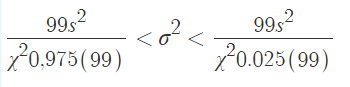

Критические точки для хи-квадрат распределения с 99-ю степенями свободы на уровне 0.975 и 0.025 равны соотвественно: 73.36 и 128.4. Подставим все значения в формулы выше и посчитаем границы интервала:

In [ ]:
g2 = round((99 * s_square) / 73.36, 3)
g1 = round((99 * s_square) / 128.4, 3)

print(f'[{g1}, {g2}]')

[0.061, 0.106]


Теоретическое значение дисперсии (σ^2 = 0.1) принадлежит этому интервалу, значит, оснований отклонить гипотезу Н0 нет.

**№3**

Проверим гипотезу о виде распределения

Н0: F(x) = G(x), где F(x) - эмпирическая функция распределения, G(x) - теоретическая

Н1: F(x) != G(x)

Одним из наиболее эффективных критериев проверки нормальности распределения является **критерий Шапиро-Уилка**. Для его применения воспользуемся встроенной функцией из библиотеки, реализующей тест Шапиро-Уилка.

In [ ]:
from scipy.stats import shapiro

stat, p = shapiro(data)
print('pvalue =', round(p, 3))

pvalue = 0.573


Минимальный уровень значимости p-value, на котором мы можем отклонить Н0, больше выбранного уровня значимости α = 0.05, следовательно, нет оснований
отклонить H0.

В качестве еще одного способа проверки вида распределения можно использовать тест Колмогорова-Смирнова. Для этого воспользуемся втроенной функцией из библиотеки:

In [ ]:
from scipy.stats import kstest

kstest(data, 'norm', args=(1, 0.31))

KstestResult(statistic=0.10583201874817466, pvalue=0.19806288941080222, statistic_location=0.9889883874163273, statistic_sign=-1)

В данном случае p-value также больше 0.05, значит, оснований отклонить гипотезу H0 нет.

Также проверить нормальность распределения можно с помощью встроенного в питон теста на нормальность:

In [ ]:
from scipy.stats import normaltest

normaltest(data)

NormaltestResult(statistic=1.4183554424684317, pvalue=0.4920486323011609)

В данном случае p-value также больше 0.05, значит, оснований отклонить гипотезу H0 нет.

**3.** **Поставить лингвистическую задачу**
1. Cвязанные выборки.

Нейронная сеть исправляет ошибки в 50 сочинениях, в каждом из которых допущена хотя бы 1 ошибка. Вначале для каждого сочинения вычислили, сколько ошибок нейронная сеть исправила правильно. Далее нейронную сеть обучили на некотором количестве данных и затем дали ей исправить ошибки в тех же 50-ти сочинениях. Снова посчитали количество правильно исправленных ошибок для каждого из 50-ти сочинений. Вопрос: стала ли нейронная сеть лучше исправлять ошибки, т.е. есть ли эффект обработки?

Данную задачу, т.е. вопрос о том, является ли изменение в исправлении ошибок нейронной сетью случайным или нет, можно свести к проверки гипотезы об однородности двух выборок: выборке до обучения и выборке после обучения.

Таким образом,

H0: изменение в исправлении ошибок случайно, выборки однородны.

H1: изменение неслучайно, т.е. имеет место эффект обработки.

Вот две наши выборки:

In [ ]:
start = [3, 2, 1, 2, 1, 0, 0, 2, 1, 4, 4, 2, 3, 3, 1, 1, 0, 2, 1, 1, 0, 1, 2, 3, 7,
         5, 2, 1, 1, 1, 2, 3, 1, 1, 2, 0, 1, 5, 3, 1, 4, 3, 2, 4, 4, 1, 5, 3, 4, 2]
final = [3, 2, 1, 0, 1, 2, 0, 1, 1, 3, 4, 4, 3, 3, 1, 1, 2, 2, 1, 1, 0, 0, 2, 0, 7,
         6, 3, 0, 2, 1, 2, 4, 1, 1, 3, 1, 2, 5, 4, 2, 3, 1, 2, 5, 6, 3, 2, 0, 4, 0]

Сначала проверим с помощью втроенного в питон теста на нормальность, являются ли выборки нормально распределенными.

In [ ]:
stat, p = normaltest(start)
print("значение P-value для начальной выборки =", p)
stat, p = normaltest(final)
print("значение P-value для окончательной выборки =", p)

значение P-value для начальной выборки = 0.035458629627185434
значение P-value для окончательной выборки = 0.041542988165964155


В обоих случаях p-value меньше уровня значимости 0,05, т.е. выборки не являются нормально распределенными. Тогда, для проверки однородности нужно использовать непараметрический критерий. Для связанных выборок можно использовать непараметрический критерий Уилкоксона. Применим специальную функцию из библиотеки:

In [ ]:
from scipy.stats import wilcoxon

stat, p = wilcoxon(start, final, alternative='less')
print('pvalue =', p, 'значение статистики =', stat)

pvalue = 0.47919368409912483 значение статистики = 173.5


P-value больше уровня значимости 0,05, значит, гипотезу H0 об однородности выборок следует принять. Таким обрзом, обучение нейронной сети не повлияло на то, как она исправляет ошибки, эффетка обработки нет.

2. Несвязанные выборки.

В первых 50-ти предложения романа "451 градус по Фаренгейту" и рассказа "Вино из одуванчиков" посчитано количество прилагательных. Вопрос: можно ли считать, что эти два произведения не отличаются по данному показателю (количеству прилагательных в первых 50-ти предложениях)?

В данном случае ответ на вопрос так же сводится к проверке однородности двух выборок.

Таким образом,

H0: произведения не различаются по данному показателю, т.е. выборки однородны.

H1: различаются, т.е. выборки неоднородны.

Вот наши выборки:

In [ ]:
novel = [0, 2, 1, 2, 1, 0, 0, 2, 1, 4, 4, 2, 3, 3, 1, 1, 0, 2, 1, 1, 0, 1, 2, 3, 7,
         1, 2, 1, 1, 1, 2, 3, 1, 1, 2, 0, 1, 5, 3, 1, 4, 3, 2, 4, 4, 1, 5, 3, 4, 2]
story = [3, 6, 1, 0, 2, 4, 0, 1, 5, 3, 4, 4, 4, 3, 5, 1, 2, 2, 3, 1, 0, 0, 1, 0, 0,
         0, 3, 0, 2, 1, 2, 0, 1, 1, 3, 1, 2, 5, 1, 2, 3, 0, 2, 9, 6, 3, 2, 0, 1, 0]

Так же проверим с помощью втроенного в питон теста на нормальность, являются ли выборки нормально распределенными.

In [ ]:
stat, p = normaltest(novel)
print("значение P-value для романа =", p)
stat, p = normaltest(story)
print("значение P-value для рассказа =", p)

значение P-value для романа = 0.010634776670184452
значение P-value для рассказа = 0.0008297240250563599


В обоих случаях p-value меньше уровня значимости 0,05, т.е. выборки не являются нормально распределенными. Тогда, для проверки однородности нужно использовать непараметрический критерий. Для независимых выборок используется критерий Манна-Уитни. Применим специальную функцию из библиотеки:

In [ ]:
from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(novel, story)
print(stat, p)

1280.0 0.8355548245321531


P-value больше уровня значимости 0,05, значит, гипотезу H0 об однородности выборок следует принять. Таким обрзом, первые 50 предложений романа и рассказа не отличаются по показателю "количество прилагательных".